In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 16

from qiskit import QuantumCircuit, IBMQ, schedule
import qiskit.pulse as pulse
from qiskit.quantum_info.states import Statevector
from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.providers import BackendV2, QubitProperties
from qiskit.providers.options import Options
from qiskit.transpiler import Target


from qiskit.providers.models import PulseDefaults
from qiskit.qobj.pulse_qobj import PulseLibraryItem, PulseQobjInstruction
from qiskit.providers.models.pulsedefaults import Command

from qiskit_experiments.exceptions import QiskitError

In [11]:
h_backend.defaults().__dict__['cmd_def'][-1].__dict__

{'_data': {},
 'name': 'x',
 'qubits': [4],
 'sequence': [PulseQobjInstruction(name="parametric_pulse", t0=0, ch="d4", label="Xp_d4", pulse_shape="drag", parameters={'amp': (0.1271611988628385+0j), 'beta': -1.6630804730223419, 'duration': 160, 'sigma': 40})]}

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
h_backend = provider.get_backend("ibmq_lima")

In [37]:
from qiskit.result import Result


In [71]:
library = FixedFrequencyTransmon(default_values={"duration": 320})
cals = Calibrations.from_backend(h_backend, libraries=[library])

freq01_estimate = h_backend.defaults().qubit_freq_est[qubit]
frequencies = np.linspace(freq01_estimate -15e6, freq01_estimate + 15e6, 51)
spec = RoughFrequencyCal(qubit, cals, frequencies, backend=h_backend)
spec.set_experiment_options(amp=0.005)

In [72]:
from qiskit_experiments.framework import ExperimentData

In [73]:
edata = ExperimentData(experiment=spec, backend=h_backend)
edata.add_jobs([h_backend.retrieve_job('632969595ccea74170944a3e')])

In [75]:
edata.data()

[{'memory': [[-807775370215424.0, -1612842763550720.0]],
  'job_id': '632969595ccea74170944a3e',
  'metadata': {'experiment_type': 'RoughFrequencyCal',
   'qubits': [0],
   'xval': 5014741873.154,
   'unit': 'Hz',
   'schedule': 'ScheduleBlock(ShiftFrequency(frequency, DriveChannel(0)), Play(GaussianSquare(duration=1072, amp=(0.005+0j), sigma=256.0, width=0.0), DriveChannel(0)), ShiftFrequency(-1.0*frequency, DriveChannel(0)), name="spectroscopy", transform=AlignLeft())'},
  'shots': 4000,
  'meas_level': 1,
  'meas_return': 'avg'},
 {'memory': [[-805294221295616.0, -1606381253689344.0]],
  'job_id': '632969595ccea74170944a3e',
  'metadata': {'experiment_type': 'RoughFrequencyCal',
   'qubits': [0],
   'xval': 5015341873.154,
   'unit': 'Hz',
   'schedule': 'ScheduleBlock(ShiftFrequency(frequency, DriveChannel(0)), Play(GaussianSquare(duration=1072, amp=(0.005+0j), sigma=256.0, width=0.0), DriveChannel(0)), ShiftFrequency(-1.0*frequency, DriveChannel(0)), name="spectroscopy", transform

In [ ]:
{'memory': [[-807775370215424.0, -1612842763550720.0]],
  'job_id': '632969595ccea74170944a3e',
  'metadata': {'experiment_type': 'RoughFrequencyCal',
   'qubits': [0],
   'xval': 5014741873.154,
   'unit': 'Hz',
   'schedule': 'ScheduleBlock(ShiftFrequency(frequency, DriveChannel(0)), Play(GaussianSquare(duration=1072, amp=(0.005+0j), sigma=256.0, width=0.0), DriveChannel(0)), ShiftFrequency(-1.0*frequency, DriveChannel(0)), name="spectroscopy", transform=AlignLeft())'},
  'shots': 4000,
  'meas_level': 1,
  'meas_return': 'avg'}

In [40]:
res = Result() #.from_dict()

TypeError: __init__() missing 6 required positional arguments: 'backend_name', 'backend_version', 'qobj_id', 'job_id', 'success', and 'results'

In [17]:
from qiskit.quantum_info import Statevector

In [21]:
Statevector([1,0,0]).sample_counts(1000)

AttributeError: 'Counts' object has no attribute 'count'

In [41]:
self.options.update_options(**options)
shots = self.options.get("shots")
meas_level = self.options.get("meas_level")

result = {
    "backend_name": f"{self.__class__.__name__}",
    "backend_version": self.backend_version,
    "qobj_id": 0,
    "job_id": 0,
    "success": True,
    "results": [],
}


for idx, circ in enumerate(run_input):
#     counts = {}
#     for key1, key2 in zip(["00", "01", "10", "11"], ["0x0", "0x1", "0x2", "0x3"]):
#         counts[key1] = sorted_memory[idx]["memory"].count(key2)
    run_result = {
        "shots": shots,
        "success": True,
        "header": {"metadata": circ.metadata},
        "meas_level": meas_level,
        "data": {
            "counts": counts,
#             "memory": sorted_memory[idx]["memory"],
        },
    }

    result["results"].append(run_result)



TypeError: to_dict() missing 1 required positional argument: 'self'

In [44]:
from qiskit.quantum_info.states import Statevector


In [25]:
Statevector(np.array([1,0,1])/np.linalg.norm(np.array([1,0,1]))).sample_counts(1000)

{'0': 485, '2': 515}

In [22]:
Statevector(np.array([1,0,0])).sample_memory(1000).

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [119]:
qc = QuantumCircuit(1)
qc.x(0)
type(qc.data[0])

qiskit.circuit.quantumcircuitdata.CircuitInstruction

In [122]:
def _get_info(instruction):
    p_dict = instruction.operation
    qubit = tuple(int(str(val)[-2]) for val in instruction.qubits)
    params = tuple(float(val) for val in p_dict.params)
    return qubit, params, p_dict.name

In [123]:
_get_info(qc.data[0])

((0,), (), 'x')

In [31]:
np.unique([1,0,0,0,1], return_counts=True)

(array([0, 1]), array([3, 2]))

{0: 3, 1: 2}

In [131]:
class PulseIQTestBackend(BackendV2):
    def __init__(
        self, static_hamiltonian, hamiltonian_operators, dt=0.1 * 1e-9, **kwargs
    ):
        super().__init__(
            None,
            name="PulseBackendV2",
            description="A PulseBackend simulator",
            online_date=datetime.datetime.utcnow(),
            backend_version="0.0.1",
        )

        self.static_hamiltonian = static_hamiltonian
        self.hamiltonian_operators = hamiltonian_operators
        self._solver = Solver(
            self.static_hamiltonian, self.hamiltonian_operators, **kwargs
        )
        self._target = Target(dt=dt, granularity=16)
        self.gs = np.zeros(self._solver.model.dim)
        self.gs[0] = 1
        self.y0 = np.eye(self._solver.model.dim)

    @property
    def target(self):
        return self._target

    @property
    def max_circuits(self):
        return None

    def defaults(self):
        return self._defaults

    @classmethod
    def _default_options(cls):
        return Options(shots=1024)

    @staticmethod
    def _get_info(inst):
        p_dict = inst.operation
        qubit = tuple(int(str(val)[-2]) for val in inst.qubits)
        params = tuple(float(val) for val in p_dict.params)
        return qubit, params, p_dict.name

    def solve(self, schedule_blocks, qubits):

        if len(qubits) > 1:
            QiskitError("TODO multi qubit gates")
        else:
            qubit = qubits[0]

        signal = converter.get_signals(schedule_blocks)
        T = schedule_blocks.duration * self.dt
        result = self.hamiltonian_solver.solve(
            t_span=[0.0, T],
            y0=self.y0,
            t_eval=[T],
            signals=signal,
            method="RK23",
        ).y[0]

        return result

    def run(self, run_inputs, meas_level=0, shots=1024):
        """Simulates the full pulse schedule"""

        if isinstance(run_inputs, QuantumCircuit):
            run_inputs = [run_inputs]

        state_vectors = []
        experiment_unitaries = {}
        
        for circuit in run_inputs:
            if circuit.calibrations.__len__ == 0:
                raise QiskitError(
                    "TODO get schedule using pulse.InstructionScheduleMap"
                )
            for name, schedule in circuit.calibrations.items():
                for (qubits, params), schedule_block in schedule.items():
                    if (name, qubits, params) not in experiment_unitaries:
                        experiment_unitaries[(name, qubits, params)] = self.solve(
                            schedule_block
                        )

            psi = self.gs.copy()
            for instruction in circuit.data:  # TODO check
                qubits, params, inst_name = self._get_info(instruction)  # TODO
                if inst_name in ["barrier", "measure"]:
                    continue
                unitary = experiment_unitaries[(inst_name, qubits, params)]
                psi = unitary @ psi

            state_vectors.append(Statevector(psi))

        return state_vectors


class SingleQubitTestBackend(PulseIQTestBackend):
    """Construct H in the init"""

    def __init__(self, omega_01, delta, lambda_0, lambda_1):

        self._defaults = PulseDefaults.from_dict(
            {
                "qubit_freq_est": [omega_01 / 1e9],
                "meas_freq_est": [0],
                "buffer": 0,
                "pulse_library": [],
                "cmd_def": [],
            }
        )
        
        omega_02 = 2 * omega_01 + delta
        ket0 = np.array([[1, 0, 0]]).T
        ket1 = np.array([[0, 1, 0]]).T
        ket2 = np.array([[0, 0, 1]]).T

        sigma_m1 = ket0 @ ket1.T.conj()
        sigma_m2 = ket1 @ ket2.T.conj()

        sigma_p1 = sigma_m1.T.conj()
        sigma_p2 = sigma_m2.T.conj()

        p1 = ket1 @ ket1.T.conj()
        p2 = ket2 @ ket2.T.conj()

        drift = 2 * np.pi * (omega_01 * p1 + omega_02 * p2)
        control = [
            2
            * np.pi
            * (lambda_0 * (sigma_p1 + sigma_m1) + lambda_1 * (sigma_p2 + sigma_m2))
        ]
        r_frame = 2 * np.pi * (omega_01 * p1 + 2 * omega_01 * p2)

        super().__init__(
            static_hamiltonian=drift,
            hamiltonian_operators=control,
            rotating_frame=r_frame,
            rwa_cutoff_freq=1.9 * omega_01,
            rwa_carrier_freqs=[omega_01],
        )
        
        self.converter = InstructionToSignals(self.dt, carriers={"d0": omega_01})


# class CXTestBackend(PulseIQTestBackend):

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["QISKIT_IN_PARALLEL"] = 'TRUE'

In [39]:

from qiskit_experiments.test.iq_pulse_backend import SingleQubitTestBackend

In [40]:
pulse_backend = SingleQubitTestBackend(5.0e9,-.25e9, 1e9, 0.8e9)

# Calibration Experiments

In [41]:
from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import (
    FixedFrequencyTransmon,
)

## spectroscopy

In [42]:
from qiskit_experiments.library.calibration.rough_frequency import RoughFrequencyCal

qubit = 0
library = FixedFrequencyTransmon()
cals = Calibrations.from_backend(pulse_backend, libraries=[library])

freq01_estimate = pulse_backend.defaults().qubit_freq_est[qubit]
frequencies = np.linspace(freq01_estimate - 15e6, freq01_estimate + 15e6, 3)
spec = RoughFrequencyCal(qubit, cals, frequencies, backend=pulse_backend)
spec.set_experiment_options(amp=0.005)

In [43]:
spec.run()

Traceback (most recent call last):
  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/nodes.py", line 187, in _format_data
    self._n_circs, self._n_shots, self._n_slots, self._n_iq = data.shape
ValueError: not enough values to unpack (expected 4, got 2)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/nodes.py", line 191, in _format_data
    self._n_circs, self._n_slots, self._n_iq = data.shape
ValueError: not enough values to unpack (expected 3, got 2)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/experiment_data.py", line 885, in _run_analysis_callback
    callback(self, **kwargs)
  File "/home/ru

ExperimentData(RoughFrequencyCal, ec42f148-4a70-4fe7-880d-f8d351c4babe, job_ids=[0], metadata=<7 items>)

In [59]:
edata.data()

[]

In [77]:
edata.data()[0]

{'memory': [[-807775370215424.0, -1612842763550720.0]],
 'job_id': '632969595ccea74170944a3e',
 'metadata': {'experiment_type': 'RoughFrequencyCal',
  'qubits': [0],
  'xval': 5014741873.154,
  'unit': 'Hz',
  'schedule': 'ScheduleBlock(ShiftFrequency(frequency, DriveChannel(0)), Play(GaussianSquare(duration=1072, amp=(0.005+0j), sigma=256.0, width=0.0), DriveChannel(0)), ShiftFrequency(-1.0*frequency, DriveChannel(0)), name="spectroscopy", transform=AlignLeft())'},
 'shots': 4000,
 'meas_level': 1,
 'meas_return': 'avg'}

In [78]:
data.data()[0]

{'counts': {'0': 1024},
 'memory': array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U21'),
 'job_id': 0,
 'metadata': {'experiment_type': 'RoughFrequencyCal',
  'qubits': (0,),
  'xval': 4985000000.0,
  'unit': 'Hz',
  'schedule': 'ScheduleBlock(ShiftFrequency(frequency, DriveChannel(0)), Play(GaussianSquare(duration=2384, amp=(0.005+0j), sigma=592.0, width=0.0), DriveChannel(0)), ShiftFrequency(-1.0*frequency, DriveChannel(0)), name="spectroscopy", transform=AlignLeft())'},
 'shots': 1024,
 'meas_level': <MeasLevel.KERNELED: 1>}

In [16]:
spec_data.analysis_results("f01")


ExperimentEntryNotFound: 'Analysis result f01 not found.\nErrors: \n[Analysis Callback ID: 2bfdececaa894b7cb0f6c753c34d2508]: Analysis callback failed [Experiment ID: 9fb8773b-785c-4130-ac86-350cfccac395][Analysis Callback ID: 2bfdececaa894b7cb0f6c753c34d2508]:\nTraceback (most recent call last):\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/data_processor.py", line 231, in _data_extraction\n    outcome = datum[self._input_key]\nKeyError: \'memory\'\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/experiment_data.py", line 885, in _run_analysis_callback\n    callback(self, **kwargs)\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/base_analysis.py", line 162, in run_analysis\n    results, figures = analysis._run_analysis(expdata)\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/curve_analysis/curve_analysis.py", line 468, in _run_analysis\n    self._initialize(experiment_data)\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/curve_analysis/base_curve_analysis.py", line 428, in _initialize\n    data_processor.train(data=experiment_data.data())\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/data_processor.py", line 202, in train\n    node.train(self._call_internal(data, call_up_to_node=index))\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/data_processor.py", line 162, in _call_internal\n    data = self._data_extraction(data)\n  File "/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/data_processing/data_processor.py", line 238, in _data_extraction\n    raise DataProcessorError(\nqiskit_experiments.data_processing.exceptions.DataProcessorError: \'The input key memory was not found in the input datum.\'\n'

In [8]:
os.getenv("QISKIT_IN_PARALLEL", "FALSE") == "FALSE"

False

In [10]:
# from qiskit.providers.fake_provider.fake_openpulse_2q import FakeOpenPulse2Q

In [66]:
%%time
results = pulse_backend.run(spec.circuits())
# spec_prob1 = np.array([psi.probabilities()[1] for psi in results])

KeyboardInterrupt: 

Text(0, 0.5, 'prob $(|1\\rangle)$')

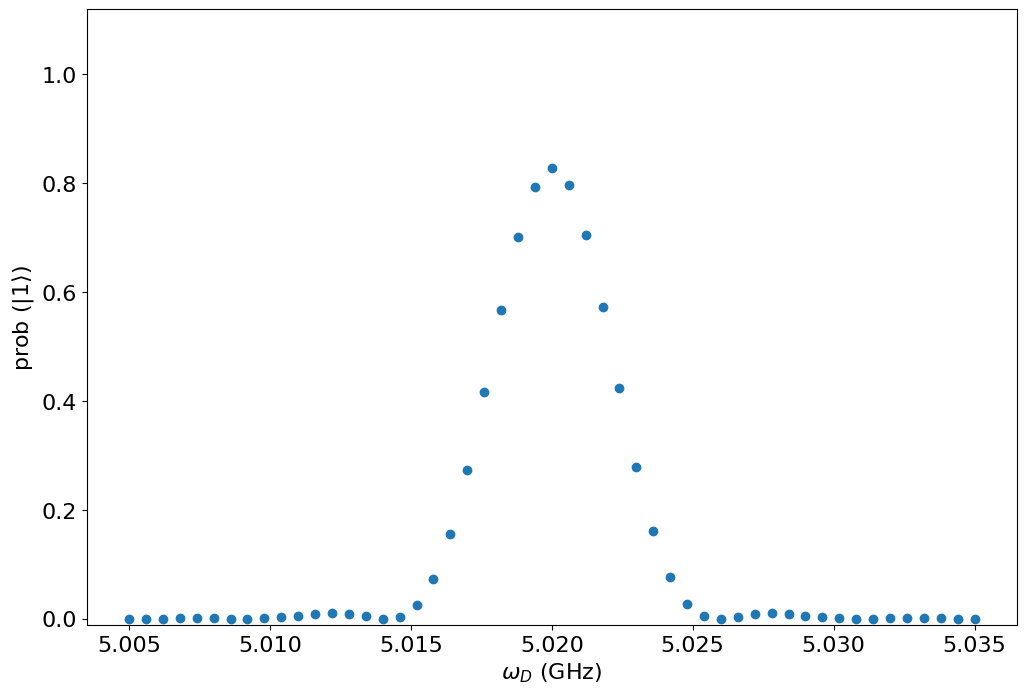

In [8]:
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(frequencies / 1e9, spec_prob1)

ax.set_ylim(-0.012, 1.12)
ax.set_xlabel("$\omega_D$ (GHz)")
ax.set_ylabel(r"prob $(|1\rangle)$")

## Rabi

In [9]:
from qiskit_experiments.library.calibration import RoughXSXAmplitudeCal

rabi = RoughXSXAmplitudeCal(
    qubit, cals, backend=pulse_backend, amplitudes=np.linspace(-0.1, 0.1, 51)
)

In [10]:
%%time
results = pulse_backend.run(rabi.circuits())

#Analysis
rabi_prob1 = np.array([psi.probabilities()[1] for psi in results])

CPU times: user 11.4 s, sys: 0 ns, total: 11.4 s
Wall time: 11.4 s


Text(0, 0.5, 'prob $(|1\\rangle)$')

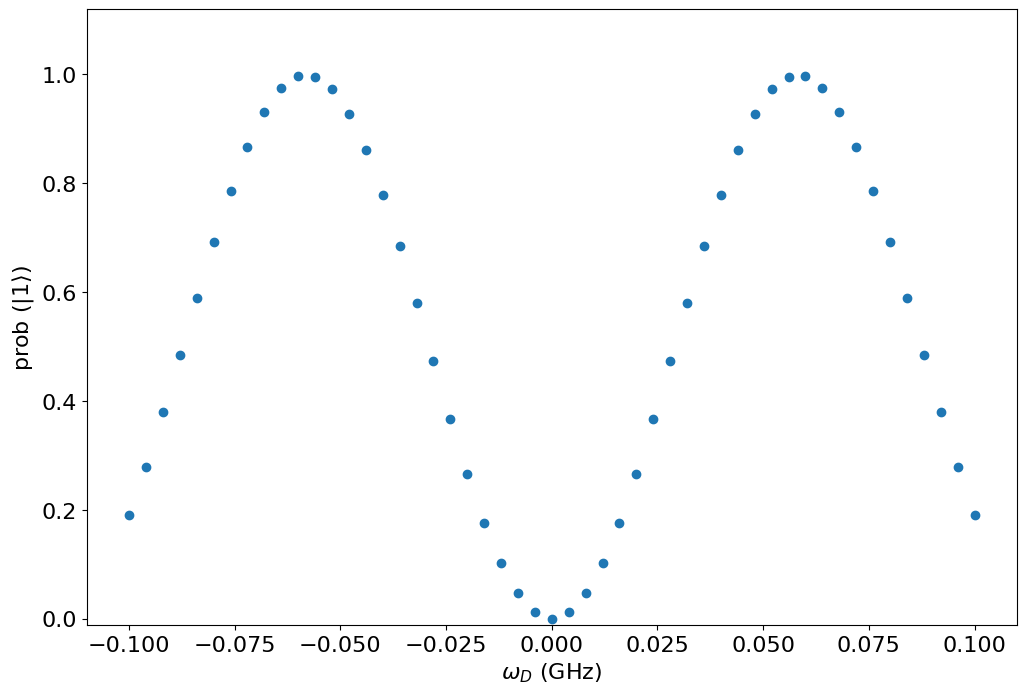

In [12]:
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.scatter(rabi.experiment_options.get("amplitudes"), rabi_prob1)
ax.set_ylim(-0.012, 1.12)
ax.set_xlabel("$\omega_D$ (GHz)")
ax.set_ylabel(r"prob $(|1\rangle)$")

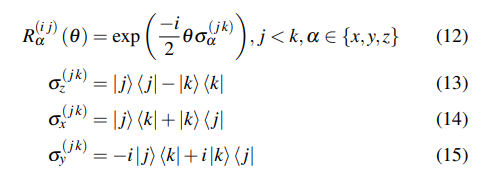

In [106]:
from scipy.linalg import expm
from sympy import Symbol, Matrix, exp, print_latex

In [115]:
theta = Symbol('theta')
sz = Matrix([[1, 0, 0], [0, 0.5, 0], [0,0, -1]])
m = -1j*theta*sz/2

In [116]:
mexp = m.exp()
mexp

Matrix([
[1.0*exp(-0.5*I*theta),                      0,                    0],
[                    0, 1.0*exp(-0.25*I*theta),                    0],
[                    0,                      0, 1.0*exp(0.5*I*theta)]])

In [117]:
mexp/exp(-1j*theta/2)

Matrix([
[1.0,                     0,                    0],
[  0, 1.0*exp(0.25*I*theta),                    0],
[  0,                     0, 1.0*exp(1.0*I*theta)]])

In [108]:
print_latex(sz)

\left[\begin{matrix}1 & 0 & 0\\0 & 0.5 & 0\\0 & 0 & -1\end{matrix}\right]
